/tmp/ipykernel_1338232/2088367039.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_recording_df = data_recording_df.append(record_dict, ignore_index=True)


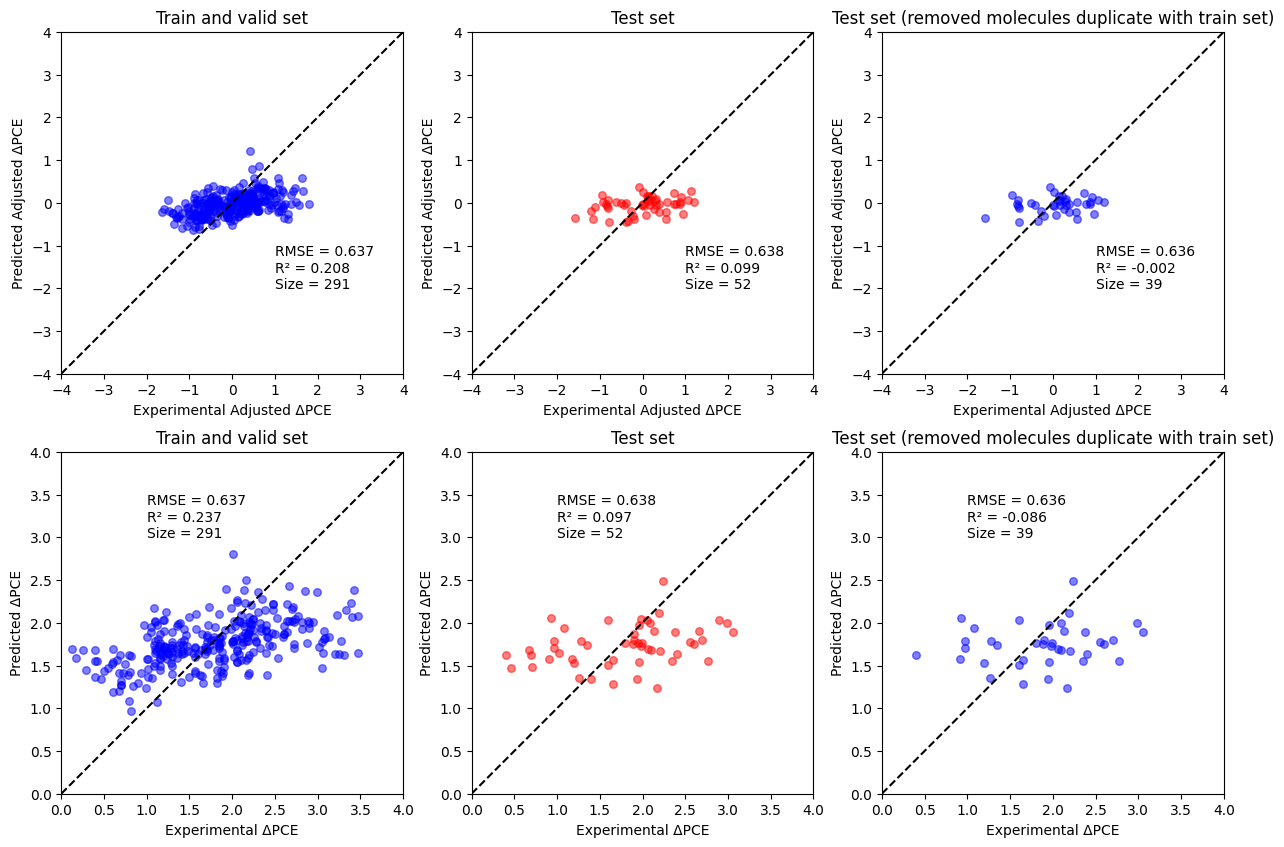

/tmp/ipykernel_1338232/2088367039.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_recording_df = data_recording_df.append(record_dict, ignore_index=True)


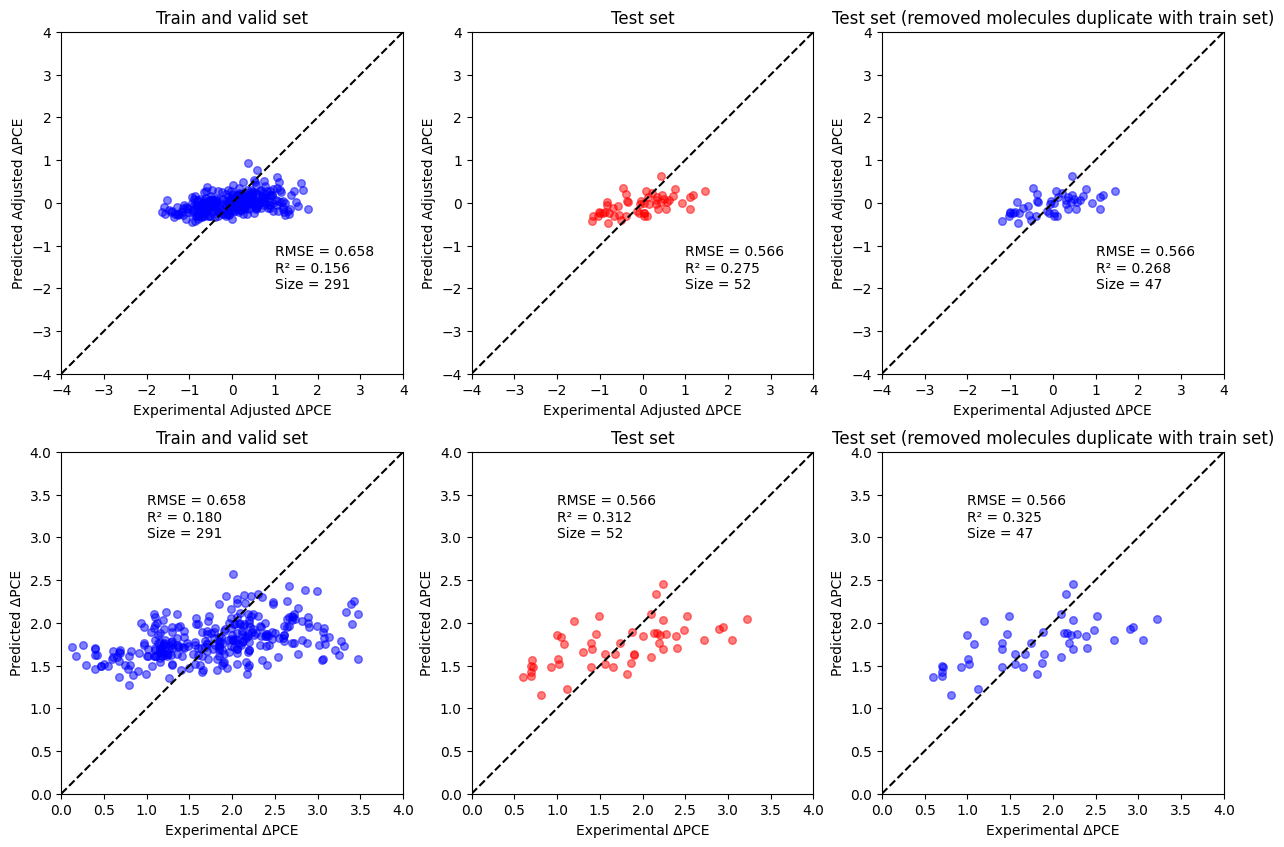

/tmp/ipykernel_1338232/2088367039.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_recording_df = data_recording_df.append(record_dict, ignore_index=True)


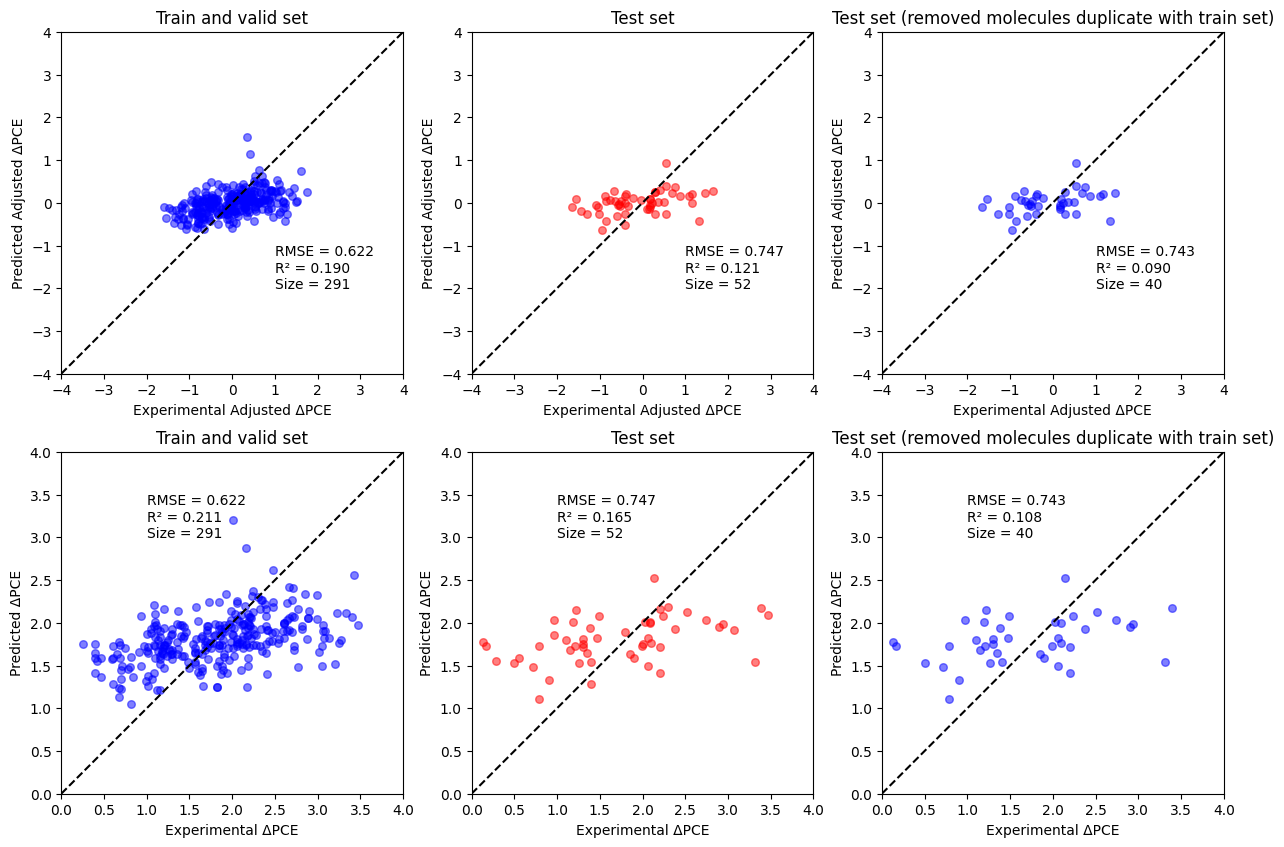

/tmp/ipykernel_1338232/2088367039.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_recording_df = data_recording_df.append(record_dict, ignore_index=True)


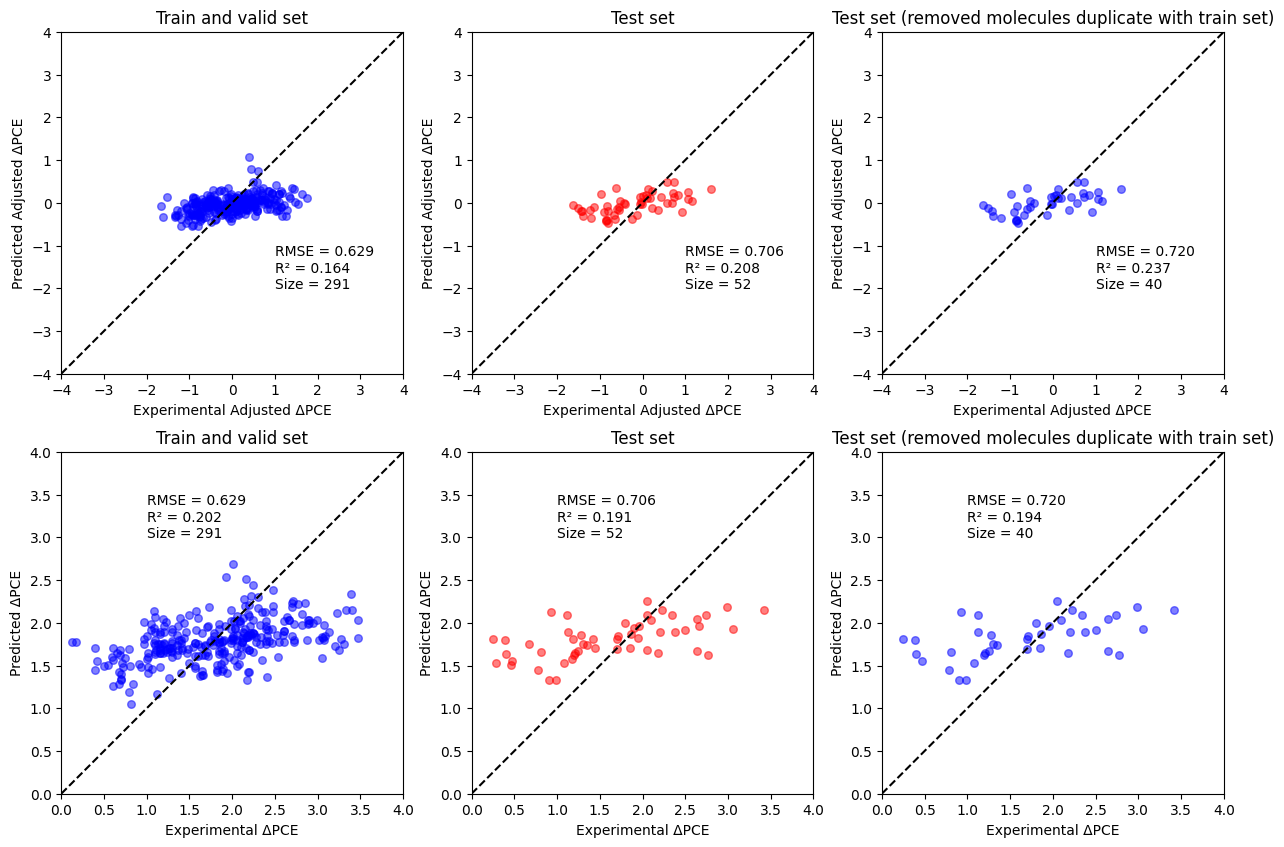

/tmp/ipykernel_1338232/2088367039.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_recording_df = data_recording_df.append(record_dict, ignore_index=True)


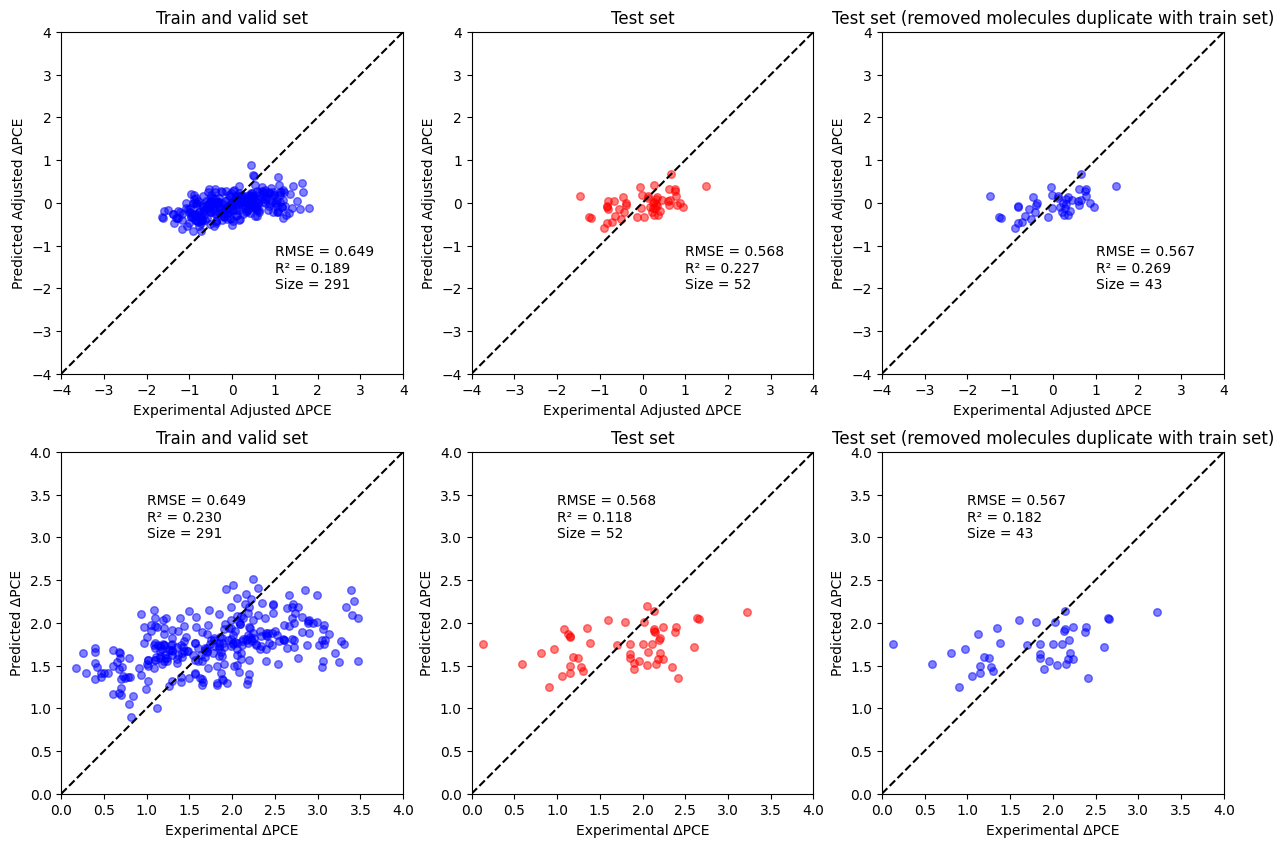

Train RMSE Mean: 0.6389 Std: 0.013
Test RMSE Mean: 0.645 Std: 0.0728
Test Cleaned RMSE Mean: 0.6465 Std: 0.0743
Train R2 Mean: 0.1812 Std: 0.0188
Test R2 Mean: 0.1859 Std: 0.0662
Test Cleaned R2 Mean: 0.1725 Std: 0.1095


,seed,train_r2,train_rmse,test_r2,test_rmse,test_cleaned_r2,test_cleaned_rmse,ib_train_r2,ib_train_rmse,ib_test_r2,ib_test_rmse,ib_test_cleaned_r2,ib_test_cleaned_rmse
0,0.0,0.207810,0.636583,0.098976,0.638237,-0.002375,0.635919,0.237237,0.636583,0.096712,0.638237,-0.085971,0.635919
1,1.0,0.156042,0.657963,0.274946,0.565631,0.268189,0.566155,0.180036,0.657963,0.311739,0.565631,0.324742,0.566155
2,2.0,0.189817,0.622132,0.120556,0.747420,0.090360,0.743238,0.210677,0.622132,0.164711,0.747420,0.108088,0.743238
3,3.0,0.163921,0.629118,0.208162,0.705959,0.237206,0.720024,0.202402,0.629118,0.191169,0.705959,0.194313,0.720024
4,4.0,0.188571,0.648856,0.226882,0.567863,0.268970,0.567403,0.229549,0.648856,0.118246,0.567863,0.182220,0.567403


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
import os
import pandas as pd
import joblib
columns = [
    'seed',
    'train_r2', 'train_rmse',
    'test_r2', 'test_rmse',
    'test_cleaned_r2', 'test_cleaned_rmse',
    'ib_train_r2', 'ib_train_rmse',
    'ib_test_r2', 'ib_test_rmse',
    'ib_test_cleaned_r2', 'ib_test_cleaned_rmse'
]
data_recording_df = pd.DataFrame(columns=columns)
train_rmses = []
test_rmses = []
test_cleaned_rmses = []
train_r2s = []
test_r2s = []
test_cleaned_r2s = []
for seed in range(0,5):
    base_dir = 'data/perovskite-resplit/split_seed_'+str(seed)+'/'

    train_csv_path = base_dir+'train_ensemble_new.csv'
    test_cleaned_csv_path = base_dir+'test_cleaned_ensemble_new.csv'
    test_csv_path = base_dir+'test_ensemble_new.csv'
    
    record_dict = {'seed': seed}


    fig,( (ax1, ax2,ax3),(ax4,ax5,ax6) )= plt.subplots(2, 3, figsize=(15, 10))

    if True:

        experimental_train_delta_PCE=pd.read_csv(train_csv_path)['TARGET']
        predicted_train_delta_PCE = pd.read_csv(train_csv_path)['prediction']
        ax1.plot([-4, 4], [-4, 4], '--',color='black')  
        ax1.scatter(experimental_train_delta_PCE,predicted_train_delta_PCE,color='b',alpha=0.5,s=30)
        RMSE=np.sqrt(mean_squared_error(experimental_train_delta_PCE,predicted_train_delta_PCE))
        R2=r2_score(experimental_train_delta_PCE,predicted_train_delta_PCE)
        record_dict['train_r2'] = R2
        record_dict['train_rmse'] = RMSE
        train_rmses.append(RMSE)
        train_r2s.append(R2)
        ax1.set_xlim(-4,4)
        ax1.set_ylim(-4,4)
        ax1.set_xlabel('Experimental Adjusted ΔPCE')
        ax1.set_ylabel('Predicted Adjusted ΔPCE')
        ax1.text(1, -2, f'RMSE = {RMSE:.3f}\nR² = {R2:.3f}\nSize = {len(experimental_train_delta_PCE)}')
        ax1.set_aspect('equal')
        ax1.set_title('Train and valid set')

    if True:
        predicted_test_delta_PCE=pd.read_csv(test_csv_path)['prediction']
        experimental_test_delta_PCE=pd.read_csv(test_csv_path)['TARGET']
        ax2.plot([-4, 4], [-4, 4], '--',color='black')  
        ax2.scatter(experimental_test_delta_PCE,predicted_test_delta_PCE,color='r',alpha=0.5,s=30)
        RMSE=np.sqrt(mean_squared_error(experimental_test_delta_PCE,predicted_test_delta_PCE))
        R2=r2_score(experimental_test_delta_PCE,predicted_test_delta_PCE)
        record_dict['test_r2'] = R2
        record_dict['test_rmse'] = RMSE

        test_rmses.append(RMSE)
        test_r2s.append(R2)
        ax2.set_xlim(-4,4)
        ax2.set_ylim(-4,4)
        ax2.set_xlabel('Experimental Adjusted ΔPCE')
        ax2.set_ylabel('Predicted Adjusted ΔPCE')
        ax2.text(1, -2, f'RMSE = {RMSE:.3f}\nR² = {R2:.3f}\nSize = {len(experimental_test_delta_PCE)}')
        ax2.set_aspect('equal')
        ax2.set_title('Test set')

    if True:

        predicted_test_cleaned_delta_PCE = pd.read_csv(test_cleaned_csv_path)['prediction']
        experimental_test_cleaned_delta_PCE=pd.read_csv(test_cleaned_csv_path)['TARGET']
        ax3.plot([-4, 4], [-4, 4], '--',color='black')  
        ax3.scatter(experimental_test_cleaned_delta_PCE,predicted_test_cleaned_delta_PCE,color='b',alpha=0.5,s=30)
        RMSE=np.sqrt(mean_squared_error(experimental_test_cleaned_delta_PCE,predicted_test_cleaned_delta_PCE))
        R2=r2_score(experimental_test_cleaned_delta_PCE,predicted_test_cleaned_delta_PCE)
        record_dict['test_cleaned_r2'] = R2
        record_dict['test_cleaned_rmse'] = RMSE
        test_cleaned_rmses.append(RMSE)
        test_cleaned_r2s.append(R2)
        ax3.set_xlim(-4,4)
        ax3.set_ylim(-4,4)
        ax3.set_xlabel('Experimental Adjusted ΔPCE')
        ax3.set_ylabel('Predicted Adjusted ΔPCE')
        ax3.text(1, -2, f'RMSE = {RMSE:.3f}\nR² = {R2:.3f}\nSize = {len(experimental_test_cleaned_delta_PCE)}')
        ax3.set_aspect('equal')
        ax3.set_title('Test set (removed molecules duplicate with train set)')

    if True:
        ypred=pd.read_csv(train_csv_path)['Delta_pred']
 
        predicted_train_delta_PCE = pd.read_csv(train_csv_path)['prediction']+ypred
        experimental_train_delta_PCE=pd.read_csv(train_csv_path)['TARGET']+ypred
        ax4.plot([0, 4], [0, 4], '--',color='black')  
        ax4.scatter(experimental_train_delta_PCE,predicted_train_delta_PCE,color='b',alpha=0.5,s=30)
        RMSE=np.sqrt(mean_squared_error(experimental_train_delta_PCE,predicted_train_delta_PCE))
        R2=r2_score(experimental_train_delta_PCE,predicted_train_delta_PCE)
        record_dict['ib_train_r2'] = R2
        record_dict['ib_train_rmse'] = RMSE
        ax4.set_xlim(0,4)
        ax4.set_ylim(0,4)
        ax4.set_xlabel('Experimental ΔPCE')
        ax4.set_ylabel('Predicted ΔPCE')
        ax4.text(1, 3, f'RMSE = {RMSE:.3f}\nR² = {R2:.3f}\nSize = {len(experimental_train_delta_PCE)}')
        ax4.set_aspect('equal')
        ax4.set_title('Train and valid set')

    if True:
        ypred=pd.read_csv(test_csv_path)['Delta_pred']
        predicted_test_delta_PCE= pd.read_csv(test_csv_path)['prediction']+ypred
        experimental_test_delta_PCE=pd.read_csv(test_csv_path)['TARGET']+ypred
        ax5.plot([0, 4], [0, 4], '--',color='black')  
        ax5.scatter(experimental_test_delta_PCE,predicted_test_delta_PCE,color='r',alpha=0.5,s=30)
        RMSE=np.sqrt(mean_squared_error(experimental_test_delta_PCE,predicted_test_delta_PCE))
        R2=r2_score(experimental_test_delta_PCE,predicted_test_delta_PCE)
        record_dict['ib_test_r2'] = R2
        record_dict['ib_test_rmse'] = RMSE
        ax5.set_xlim(0,4)
        ax5.set_ylim(0,4)
        ax5.set_xlabel('Experimental ΔPCE')
        ax5.set_ylabel('Predicted ΔPCE')
        ax5.text(1, 3, f'RMSE = {RMSE:.3f}\nR² = {R2:.3f}\nSize = {len(experimental_test_delta_PCE)}')
        ax5.set_aspect('equal')
        ax5.set_title('Test set')

    if True:
        ypred=pd.read_csv(test_cleaned_csv_path)['Delta_pred']
        predicted_test_cleaned_delta_PCE= pd.read_csv(test_cleaned_csv_path)['prediction']+ypred
        experimental_test_cleaned_delta_PCE=pd.read_csv(test_cleaned_csv_path)['TARGET']+ypred
        ax6.plot([0, 4], [0, 4], '--',color='black')  
        ax6.scatter(experimental_test_cleaned_delta_PCE,predicted_test_cleaned_delta_PCE,color='b',alpha=0.5,s=30)
        RMSE=np.sqrt(mean_squared_error(experimental_test_cleaned_delta_PCE,predicted_test_cleaned_delta_PCE))
        R2=r2_score(experimental_test_cleaned_delta_PCE,predicted_test_cleaned_delta_PCE)
        record_dict['ib_test_cleaned_r2'] = R2
        record_dict['ib_test_cleaned_rmse'] = RMSE
        ax6.set_xlim(0,4)
        ax6.set_ylim(0,4)
        ax6.set_xlabel('Experimental ΔPCE')
        ax6.set_ylabel('Predicted ΔPCE')
        ax6.text(1, 3, f'RMSE = {RMSE:.3f}\nR² = {R2:.3f}\nSize = {len(experimental_test_cleaned_delta_PCE)}')
        ax6.set_aspect('equal')
        ax6.set_title('Test set (removed molecules duplicate with train set)')
    data_recording_df = data_recording_df.append(record_dict, ignore_index=True)
    plt.savefig('perovskite_result_molclr_seed_'+str(seed)+'.png')
    plt.show()

print("Train RMSE Mean:", round(np.mean(train_rmses), 4), "Std:", round(np.std(train_rmses), 4))
print("Test RMSE Mean:", round(np.mean(test_rmses), 4), "Std:", round(np.std(test_rmses), 4))
print("Test Cleaned RMSE Mean:", round(np.mean(test_cleaned_rmses), 4), "Std:", round(np.std(test_cleaned_rmses), 4))
print("Train R2 Mean:", round(np.mean(train_r2s), 4), "Std:", round(np.std(train_r2s), 4))
print("Test R2 Mean:", round(np.mean(test_r2s), 4), "Std:", round(np.std(test_r2s), 4))
print("Test Cleaned R2 Mean:", round(np.mean(test_cleaned_r2s), 4), "Std:", round(np.std(test_cleaned_r2s), 4))
data_recording_df